In [23]:
import matplotlib.pyplot as plt
import numpy as np

def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = x[i] + 360
        else:
            x[i] = x[i]
    return x

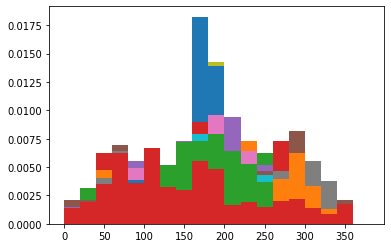

In [44]:
lipids = ["ps", "pc", "pg", "pe"]
#files = ["../Data/PDBdistributions/ps_parsed.csv", "../Data/PDBdistributions/pc_parsed.csv", "../Data/PDBdistributions/pe_parsed.csv", "../Data/PDBdistributions/pg_parsed.csv"]

sum = {"ps":0, "pc":0, "pg":0, "pe":0}

dihedrals = {"dih1":7, "dih2":8, "dih3":9, "dih4":10, "dih5":11, "dih6":12}


for lipid in lipids:
    dih = {"dih1":[], "dih2":[], "dih3":[], "dih4":[], "dih5":[], "dih6":[]}
    filename = "../Data/PDBdistributions/" + lipid + "_parsed.csv"
    with open(filename, "r") as file:
        lines=file.readlines()[1:]
        for line in lines:
            resolution = float(line.split()[4])
            if resolution < 3.6:
                for dihedral in dihedrals:
                    column = dihedrals[dihedral]
                    dih[dihedral].append(float(line.split()[column]))
                    sum[lipid] = sum[lipid] + 1/6
        for dihedral in dihedrals:
            dist = plt.hist(make_positive_angles(dih[dihedral]), bins=range(0,400,20), density=True)
            outfile=open('../Data/' + lipid + dihedral + '.dat','w')
            for i in range(len(dist[0])):
                #print(str(dist[1][i]),str(dist[0][i]))
                outfile.write(str(dist[1][i]) + " " + str(dist[0][i]) + "\n")
            outfile.close()

In [45]:
sum

{'pc': 608.0000000000014,
 'pe': 543.0000000000161,
 'pg': 171.99999999999895,
 'ps': 47.99999999999986}

In [31]:
dist

(array([0.        , 0.00208333, 0.00520833, 0.003125  , 0.00208333,
        0.        , 0.003125  , 0.00104167, 0.00104167, 0.00729167,
        0.00416667, 0.00208333, 0.        , 0.00729167, 0.003125  ,
        0.00416667, 0.00208333, 0.00208333, 0.        ]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340, 360, 380]),
 <a list of 19 Patch objects>)